In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Loading Dataset : Boston Dataset

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
X = boston.data
Y = boston.target
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [5]:
desc = boston.DESCR
print(desc)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Spliting into training and test data 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.15)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(430, 13)
(76, 13)
(430,)
(76,)


## Using sklearn Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression(normalize=True)

In [12]:
%%time
lr.fit(X_train,Y_train)

CPU times: user 8.63 ms, sys: 563 µs, total: 9.19 ms
Wall time: 28.8 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [13]:
lr.coef_

array([-1.10983614e-01,  4.32954596e-02,  5.94064325e-02,  2.64274253e+00,
       -1.75628723e+01,  3.82813680e+00,  3.90513356e-03, -1.33087333e+00,
        3.07914245e-01, -1.32277357e-02, -9.56782524e-01,  7.24043326e-03,
       -5.35445786e-01])

In [14]:
lr.intercept_

36.30710038987924

In [15]:
#Training Score
lr.score(X_train,Y_train)

0.739204017201626

In [16]:
#Testing Score
lr.score(X_test, Y_test)

0.7338022334411732

# Creating model from scratch

Different types of models for multivariate linear regression:-
- Gradient Descent using matrices.
- Gradient Descent without using matrices
- Closed Form Solution
- Locally Weighted Regression (LOWESS)

In [18]:
# normalize the data
X = (X-X.mean())/X.std()

### Method 1 : G.D. using matrices

In [19]:
def hypothesis(x,w,b):
    return w.T@x + b

def error(X,Y,w,b):
    ones = np.ones((X.shape[0],1))
    X_ = np.hstack((ones,X))
    theta = np.vstack((np.array([b]),w))
    return (0.5*np.sum((X_@theta - Y).T@(X_@theta - Y)))/X.shape[0]

def gradient(X,Y,w,b):
    grad0 = X@w - Y
    grad = X.T@grad0
    grad0 = np.sum(grad0)
    return grad0/X.shape[0],grad/X.shape[0]

def gradienDescent(X,Y,learning_rate=0.000001,threshold_error=0.0000000001,max_itr=100):
    w = np.zeros((X.shape[1],1))
    b = 0
    itr = 0
    err_list = []
    while itr<max_itr:
        itr += 1
        g0,g = gradient(X,Y,w,b)
        w = w - learning_rate*g
        b = b - learning_rate*g0
        e = error(X,Y,w,b)
        err_list.append(e)
        try:
            if abs(err_list[-2]-e) <= threshold_error:
                return w, err_list
        except IndexError:
            pass
    return w, b, err_list

In [20]:
print(Y_train.shape)
Y_t = Y_train.reshape((-1,1))
print(Y_t.shape)

(430,)
(430, 1)


In [21]:
%%time
final_w, final_b, err_lst = gradienDescent(X_train,Y_t,max_itr=4000000)

CPU times: user 8min 7s, sys: 128 ms, total: 8min 7s
Wall time: 4min 3s


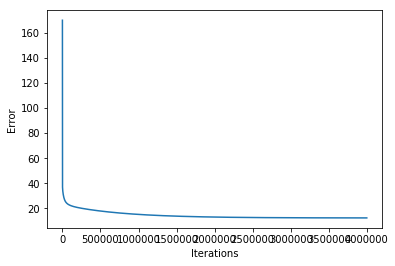

In [22]:
plt.plot(err_lst)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

In [23]:
#error in last 10 iterations(epochs)
print(err_lst[-10:])

[12.312270805122797, 12.31227076072237, 12.312270716322043, 12.31227067192182, 12.312270627521693, 12.31227058312167, 12.312270538721746, 12.312270494321917, 12.312270449922195, 12.312270405522577]


In [24]:
from sklearn.metrics import r2_score

Y_actual_train = Y_train
Y_pred_train = np.zeros(Y_actual_train.shape)

for i in range(X_train.shape[0]):
    Y_pred_train[i] = hypothesis(X_train[i], final_w, final_b)
print("Training Score %f"%(r2_score(Y_actual_train, Y_pred_train)))

Training Score 0.702964


In [25]:
from sklearn.metrics import r2_score

Y_actual_test = Y_test
Y_pred_test = np.zeros(Y_actual_test.shape)

for i in range(X_test.shape[0]):
    Y_pred_test[i] = hypothesis(X_test[i], final_w, final_b)
print("Testing Score %f"%(r2_score(Y_actual_test, Y_pred_test)))

Testing Score 0.703785


### Method 2 : G.D. without using matrices

In [26]:
def hypothesis_(x,theta):
    
    a = np.array([1])
    x = np.hstack((a,x))
    #     return theta.T@x
    y=0
    for i in range(theta.shape[0]):
        y += theta[i] * x[i]
    return y
        


def error_(x,y,theta):
    e = 0
    m = x.shape[0]
    for i in range(m):
        h = hypothesis_(x[i],theta)
        e += 0.5*(h - y[i])**2
    return e/m

def gradient_(x,y,theta):
    grad = np.zeros((x.shape[1]+1,))
    for i in range(x.shape[0]):
        h = hypothesis_(x[i],theta)
        grad[0] += (h - y[i])
        for j in range(x.shape[1]):
            grad[j+1] += (h - y[i])*x[i,j]
    return grad/x.shape[0]

def batch_gradient_(x,y,theta,batch_size=1):
    grad = np.zeros((x.shape[1]+1,))
    m = x.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    indices = indices[:batch_size]
    for i in indices:
        h = hypothesis_(x[i],theta)
        grad[0] += (h - y[i])
        for j in range(x.shape[1]):
            grad[j+1] += (h - y[i])*x[i,j]
    return grad/batch_size

def gradientDescent_(x,y,learning_rate=0.000001, threshold_error=0.0000000001, max_itr=100):
    theta = np.zeros((x.shape[1]+1,))
    itr = 0
    err_list = []
    while itr<max_itr:
        itr += 1
        theta = theta - learning_rate*gradient_(x,y,theta)
        e = error_(x,y,theta)
        err_list.append(e)
        try:
            if abs(err_list[-2]-e) <= threshold_error:
                return theta, err_list
        except IndexError:
            pass
    return theta, err_list

def gradientDescentMiniBatch_(x,y,learning_rate=0.000001, threshold_error=10, max_itr=100, batch_size=1):
    theta = np.zeros((x.shape[1]+1,))
    itr = 0
    err_list = []
    while itr<max_itr:
        itr += 1
        theta = theta - learning_rate*batch_gradient_(x,y,theta,batch_size)
        e = error_(x,y,theta)
        err_list.append(e)
        try:
            if np.mean(err_list[-10:])<threshold_error:
                return theta, err_list
        except IndexError:
            pass
    return theta, err_list

In [29]:
%%time
final_theta, error_list = gradientDescent_(X_train,Y_train,max_itr=100000)

CPU times: user 19min 39s, sys: 7.85 s, total: 19min 47s
Wall time: 19min 37s


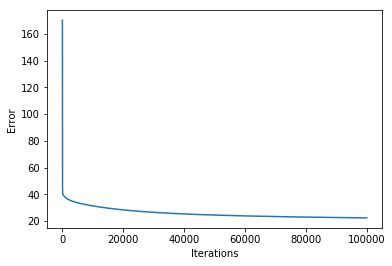

In [30]:
plt.plot(error_list)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

In [31]:
#error in last 10 iterations(epochs)
print(error_list[-10:])

[22.380488855306965, 22.38046211725205, 22.380435379541627, 22.380408642175695, 22.38038190515423, 22.38035516847723, 22.380328432144683, 22.380301696156565, 22.3802749605129, 22.3802482252136]


In [32]:
Y_actual_train = Y_train
Y_pred_train = np.zeros(Y_actual_train.shape)

for i in range(X_train.shape[0]):
    Y_pred_train[i] = hypothesis_(X_train[i], final_theta)
print("Training Score %f"%(r2_score(Y_actual_train, Y_pred_train)))

Training Score 0.460072


In [33]:
Y_actual_test = Y_test
Y_pred_test = np.zeros(Y_actual_test.shape)

for i in range(X_test.shape[0]):
    Y_pred_test[i] = hypothesis_(X_test[i], final_theta)
print("Testing Score %f"%(r2_score(Y_actual_test, Y_pred_test)))

Testing Score 0.442603


#### Mini-Batch G.D.

In [34]:
%%time
final_theta_mb, error_list_mb = gradientDescentMiniBatch_(X_train,Y_train,learning_rate=0.000001,max_itr=1000, batch_size=5)

CPU times: user 4.43 s, sys: 48.1 ms, total: 4.48 s
Wall time: 4.4 s


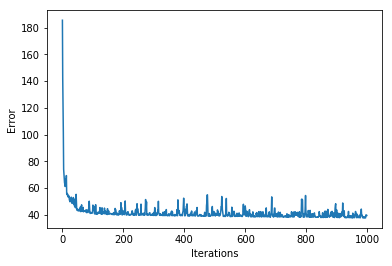

In [35]:
plt.plot(error_list_mb)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

In [36]:
#error in last 10 iterations(epochs)
print(error_list[-10:])

[22.380488855306965, 22.38046211725205, 22.380435379541627, 22.380408642175695, 22.38038190515423, 22.38035516847723, 22.380328432144683, 22.380301696156565, 22.3802749605129, 22.3802482252136]


In [37]:
Y_actual_train = Y_train
Y_pred_train = np.zeros(Y_actual_train.shape)

for i in range(X_train.shape[0]):
    Y_pred_train[i] = hypothesis_(X_train[i], final_theta_mb)
print("Training Score %f"%(r2_score(Y_actual_train, Y_pred_train)))

Training Score 0.047544


### Method 3 : Closed Form Solution

In [38]:
def getTheta(X,Y):
    ones = np.ones((X.shape[0],1))
    x = np.hstack((ones,X))
    return np.linalg.pinv(x.T@x)@x.T@Y
def hypothesis(x,theta):
    
    a = np.array([1])
    x = np.hstack((a,x))
    return theta.T@x

In [39]:
%%time
theta_cf = getTheta(X_train, Y_t)

CPU times: user 2.31 ms, sys: 3.95 ms, total: 6.26 ms
Wall time: 5.72 ms


In [40]:
theta_cf.shape

(14, 1)

In [41]:
Y_actual_train = Y_train
Y_pred_train = np.zeros(Y_actual_train.shape)

for i in range(X_train.shape[0]):
    Y_pred_train[i] = hypothesis(X_train[i], theta_cf)
print("Training Score %f"%(r2_score(Y_actual_train, Y_pred_train)))

Training Score 0.739204


In [42]:
Y_actual_test = Y_test
Y_pred_test = np.zeros(Y_actual_test.shape)

for i in range(X_test.shape[0]):
    Y_pred_test[i] = hypothesis(X_test[i], theta_cf)
print("Training Score %f"%(r2_score(Y_actual_test, Y_pred_test)))

Training Score 0.733802


### Method 4 : Locally Weighted Regression (LOWESS)

#### Without Bias

In [68]:
def getW(query_x,X,tau=1):
    M = X.shape[0]
    W = np.eye(M)
    x = query_x
    for i in range(M):
        W[i,i] = np.exp(((X[i]-x).T@(X[i]-x))/(-2*tau*tau))
    return W

def getTheta(X,Y,query_x,tau=1):
    W = getW(query_x,X,tau)
    #theta = ((X.W.XT)^-1).XT.W.Y
    return np.linalg.pinv(X.T@(W@X))@X.T@(W@Y)

def predict(query_x,X,Y,tau=1):
    theta = getTheta(X,Y,query_x,tau)
    return theta.T@query_x

In [69]:
Y_actual_train = Y_train
Y_pred_train = np.zeros(Y_actual_train.shape)

for i in range(X_train.shape[0]):
    Y_pred_train[i] = predict(X_train[i],X_train,Y_train, tau=10)
print("Training Score %f"%(r2_score(Y_actual_train, Y_pred_train)))

Training Score 0.987632


In [70]:
Y_actual_test = Y_test
Y_pred_test = np.zeros(Y_actual_test.shape)

for i in range(X_test.shape[0]):
    Y_pred_test[i] = predict(X_test[i],X_train,Y_train, tau=10)
print("Testing Score %f"%(r2_score(Y_actual_test, Y_pred_test)))

Testing Score 0.755681


#### With Bias

In [71]:
def getW(query_x,X,tau=1):
    M = X.shape[0]
    W = np.eye(M)
    x = query_x
    for i in range(M):
        W[i,i] = np.exp(((X[i]-x).T@(X[i]-x))/(-2*tau*tau))
    return W

def getTheta(X,Y,query_x,tau=1):
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    W = getW(query_x,X,tau)
    #theta = ((X.W.XT)^-1).XT.W.Y
    return np.linalg.pinv(X.T@(W@X))@X.T@(W@Y)

def predict(query_x,X,Y,tau=1):
    a = np.array([1])
    x = np.hstack((a,query_x))
    theta = getTheta(X,Y,x,tau)
    return theta.T@x

In [72]:
Y_actual_train = Y_train
Y_pred_train = np.zeros(Y_actual_train.shape)

for i in range(X_train.shape[0]):
    Y_pred_train[i] = predict(X_train[i],X_train,Y_train, tau=10)
print("Training Score %f"%(r2_score(Y_actual_train, Y_pred_train)))

Training Score 0.987866


In [73]:
Y_actual_test = Y_test
Y_pred_test = np.zeros(Y_actual_test.shape)

for i in range(X_test.shape[0]):
    Y_pred_test[i] = predict(X_test[i],X_train,Y_train, tau=10)
print("Testing Score %f"%(r2_score(Y_actual_test, Y_pred_test)))

Testing Score 0.740095
